In [1]:
# Libraries import
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

c:\Users\79296\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\79296\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\79296\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-pastel')

In [4]:
# Dataframe import
df = pd.read_csv('data/train_heart.csv', sep = ',')
display(df)

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,47.832254,1,4.000000,118.418763,300.876566,0,2,161.831133,1,3.151432,2,2,7,1
599996,599996,42.106575,1,3.000000,106.110468,271.719955,0,2,178.749408,1,1.925267,2,0,7,1
599997,599997,41.579352,1,1.295676,128.896878,279.301722,0,0,175.869174,1,0.000000,1,0,7,0
599998,599998,53.716562,1,4.000000,120.061556,276.966278,0,0,171.195150,1,3.007003,2,1,3,1


In [5]:
# Dataframe for prediction import
pred = pd.read_csv('data/test_heart.csv', sep = ',')
display(pred)

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,999995,55.375600,0,3.000000,111.629089,272.110688,0,0,154.583762,0,0.000000,1,0,3
399996,999996,53.782685,1,4.000000,102.819138,285.219928,0,2,153.252226,1,0.000000,1,3,7
399997,999997,55.530874,0,2.053896,106.656515,210.870682,0,2,152.268989,1,1.719441,2,0,3
399998,999998,55.442225,1,4.000000,118.354111,280.867061,0,2,159.820939,0,0.000000,1,0,3


In [6]:
# Datatype analysis, missing values in df
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

None

In [7]:
# Delete duplicated data if any
df.drop_duplicates()
display(df)

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,47.832254,1,4.000000,118.418763,300.876566,0,2,161.831133,1,3.151432,2,2,7,1
599996,599996,42.106575,1,3.000000,106.110468,271.719955,0,2,178.749408,1,1.925267,2,0,7,1
599997,599997,41.579352,1,1.295676,128.896878,279.301722,0,0,175.869174,1,0.000000,1,0,7,0
599998,599998,53.716562,1,4.000000,120.061556,276.966278,0,0,171.195150,1,3.007003,2,1,3,1


In [8]:
# Number of unique patients IDs
df['ID'].nunique()

600000

In [9]:
# Delete ID column because it is not informative for model development
df.drop(['ID'], axis=1, inplace=True)
display(df)

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,47.832254,1,4.000000,118.418763,300.876566,0,2,161.831133,1,3.151432,2,2,7,1
599996,42.106575,1,3.000000,106.110468,271.719955,0,2,178.749408,1,1.925267,2,0,7,1
599997,41.579352,1,1.295676,128.896878,279.301722,0,0,175.869174,1,0.000000,1,0,7,0
599998,53.716562,1,4.000000,120.061556,276.966278,0,0,171.195150,1,3.007003,2,1,3,1


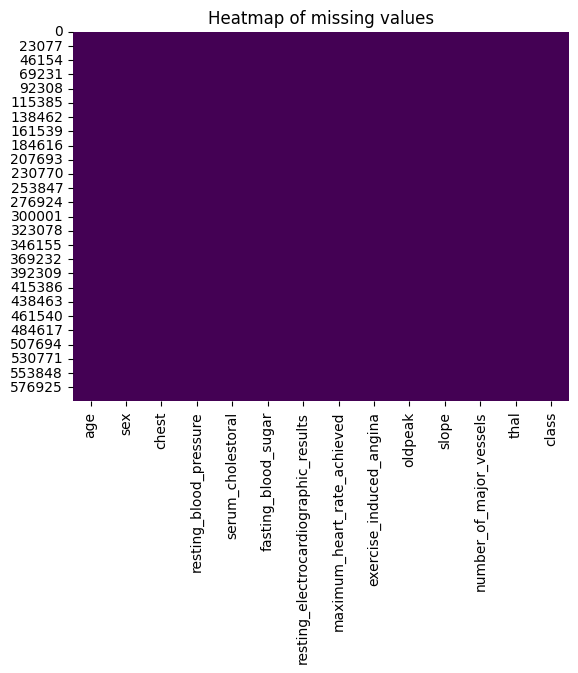

In [10]:
# Heatmap of missing values visualization
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of missing values")
plt.show()

In [11]:
# Having a look on basic statistics of data, if there are any artifacts or strong outliers
df.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,54.426085,0.677447,3.170247,131.340485,249.592420,0.150757,1.020148,149.592069,0.333502,1.051391,1.596033,0.681303,4.711378,0.444185
std,9.086041,0.467454,0.949618,17.842450,51.699976,0.357812,0.994204,23.072593,0.471464,1.144288,0.629821,0.950669,1.934766,0.496875
min,26.061695,0.000000,-0.538498,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,48.078493,0.000000,3.000000,119.924094,216.475964,0.000000,0.000000,135.704237,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.133425,1.000000,3.000000,129.727941,244.233699,0.000000,2.000000,153.224828,0.000000,0.811101,2.000000,0.000000,3.000000,0.000000
75%,60.663775,1.000000,4.000000,139.915216,274.345453,0.000000,2.000000,165.165497,1.000000,1.674081,2.000000,1.000000,7.000000,1.000000
max,79.591647,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000


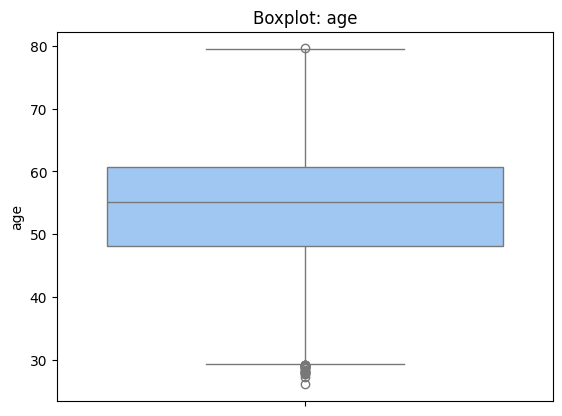

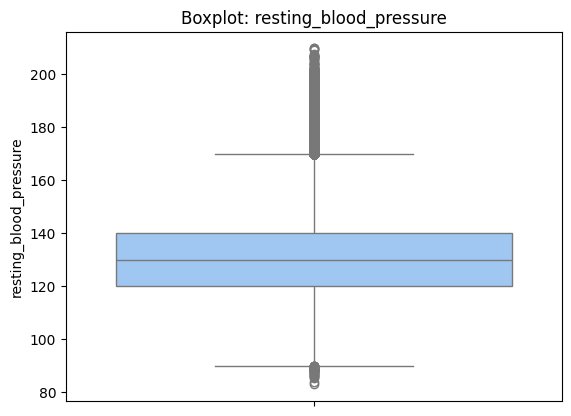

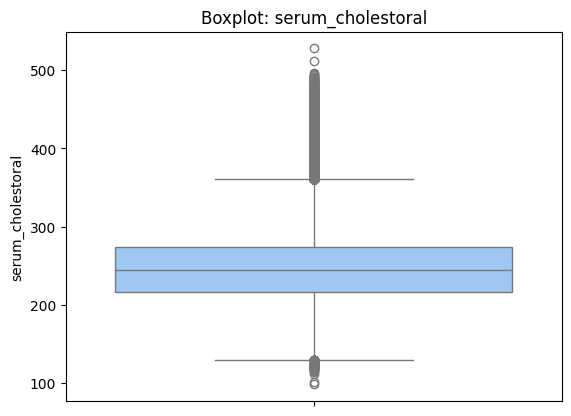

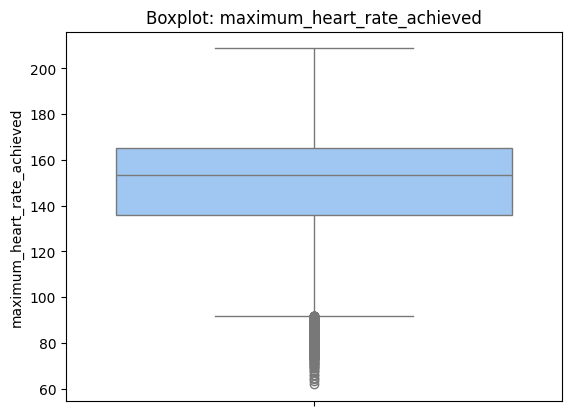

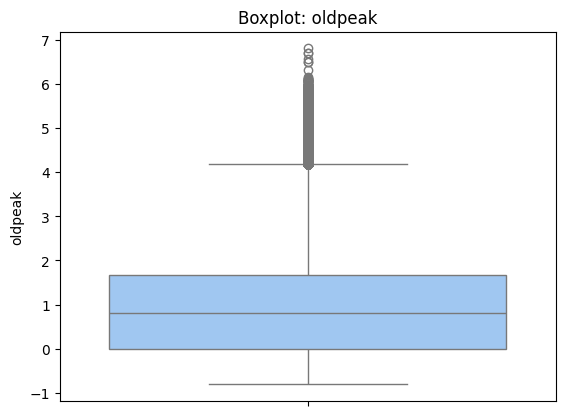

In [12]:
# Outliyers visualization for quantitive columns using box with whisker

for column in ["age", "resting_blood_pressure", "serum_cholestoral", "maximum_heart_rate_achieved", "oldpeak"]:
    sns.boxplot(df[column])
    plt.title(f"Boxplot: {column}")
    plt.show()

In [13]:
# Deleting outliyers from qualitative columns using interquartile range method (IQR)

df1 = df.copy()
for column in ["age", "resting_blood_pressure", "serum_cholestoral", "maximum_heart_rate_achieved", "oldpeak"]:
    """IQR filtering function"""

    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df1 = df1[df1[column].isna() | ((df1[column] >= lower_bound) & (df1[column] <= upper_bound))]


display(df1.describe())

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000,543189.000000
mean,54.342657,0.673081,3.156835,129.650262,243.760102,0.150843,1.014695,150.191364,0.327444,0.984473,1.581807,0.667337,4.679454,0.428262
std,9.101714,0.469088,0.951683,15.837838,44.123914,0.357896,0.994316,22.601897,0.469281,1.054037,0.626291,0.944718,1.929995,0.494827
min,29.250955,0.000000,-0.287571,89.937688,129.632704,0.000000,0.000000,91.742159,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,47.969517,0.000000,3.000000,119.595535,215.355145,0.000000,0.000000,136.277397,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.050263,1.000000,3.000000,129.311981,242.334862,0.000000,2.000000,153.558890,0.000000,0.745736,2.000000,0.000000,3.000000,0.000000
75%,60.621020,1.000000,4.000000,139.213565,271.195537,0.000000,2.000000,165.377059,1.000000,1.633464,2.000000,1.000000,7.000000,1.000000
max,79.504896,1.000000,4.000000,169.900393,361.139578,1.000000,2.000000,208.735196,1.000000,4.167373,3.000000,3.000000,7.000000,1.000000


In [14]:
# Separation of quantitive and categorial data
numeric_cols = df1[["age", "resting_blood_pressure", "serum_cholestoral", "maximum_heart_rate_achieved", "oldpeak"]]

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak
age,1.000000,0.022573,0.028392,-0.311001,0.084136
resting_blood_pressure,0.022573,1.000000,0.014473,-0.040897,0.041990
serum_cholestoral,0.028392,0.014473,1.000000,-0.047168,0.048453
maximum_heart_rate_achieved,-0.311001,-0.040897,-0.047168,1.000000,-0.143525
oldpeak,0.084136,0.041990,0.048453,-0.143525,1.000000


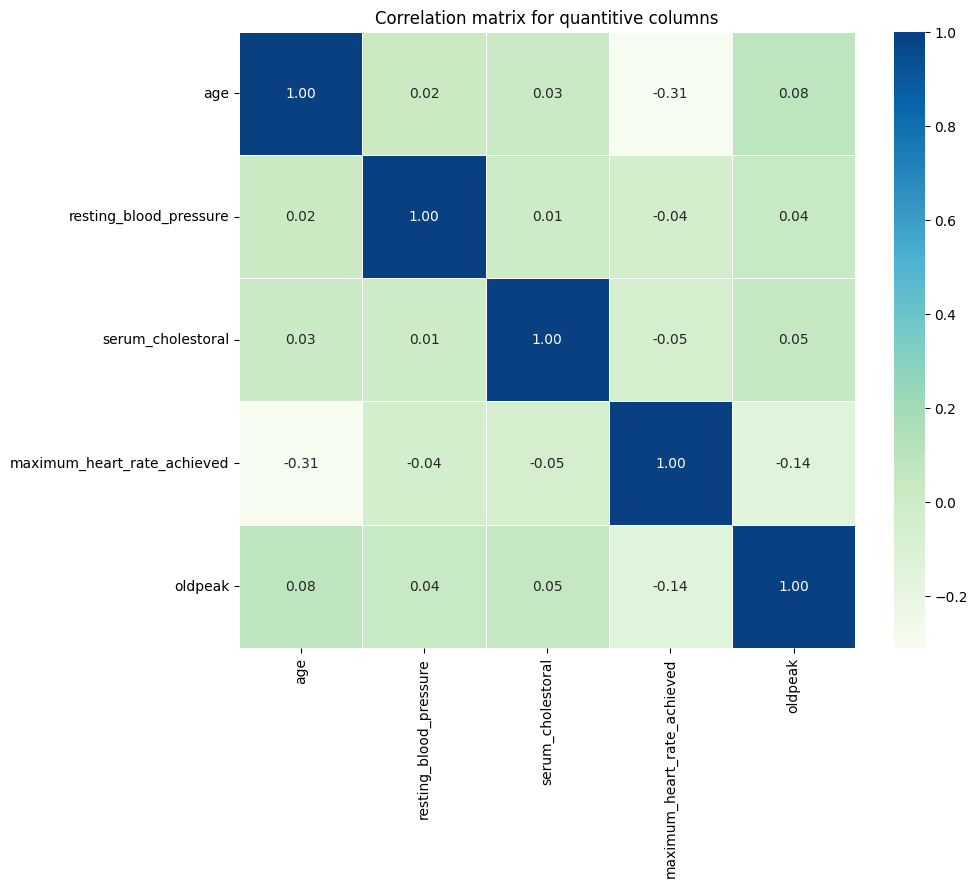

In [15]:
corr_matrix = numeric_cols.corr()
display(corr_matrix)

# Heatmap building for quantitive data
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu', square=True, fmt='.2f', linewidths=.5)
plt.title('Correlation matrix for quantitive columns')
plt.show()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
age,1.000000,0.063995,0.092036,0.022573,0.028392,-0.002291,0.039931,-0.311001,0.089699,0.084136,0.068729,0.098133,0.114458,0.220749
sex,0.063995,1.000000,0.123523,0.027898,0.037141,-0.004809,0.051815,-0.107467,0.119643,0.114105,0.091500,0.130685,0.381673,0.291135
chest,0.092036,0.123523,1.000000,0.044218,0.050064,-0.005514,0.074290,-0.153486,0.347314,0.160422,0.128868,0.185901,0.217204,0.416642
resting_blood_pressure,0.022573,0.027898,0.044218,1.000000,0.014473,-0.001361,0.016722,-0.040897,0.042574,0.041990,0.034131,0.047707,0.053154,0.105027
serum_cholestoral,0.028392,0.037141,0.050064,0.014473,1.000000,-0.003286,0.024922,-0.047168,0.049958,0.048453,0.040151,0.055079,0.063466,0.124835
fasting_blood_sugar,-0.002291,-0.004809,-0.005514,-0.001361,-0.003286,1.000000,-0.002385,0.006744,-0.009289,-0.006741,-0.005420,-0.008118,-0.008597,-0.016872
resting_electrocardiographic_results,0.039931,0.051815,0.074290,0.016722,0.024922,-0.002385,1.000000,-0.066595,0.073473,0.068715,0.054018,0.081381,0.093587,0.179493
maximum_heart_rate_achieved,-0.311001,-0.107467,-0.153486,-0.040897,-0.047168,0.006744,-0.066595,1.000000,-0.151859,-0.143525,-0.114569,-0.165742,-0.188789,-0.368172
exercise_induced_angina,0.089699,0.119643,0.347314,0.042574,0.049958,-0.009289,0.073473,-0.151859,1.000000,0.159545,0.128118,0.183791,0.211321,0.411420
oldpeak,0.084136,0.114105,0.160422,0.041990,0.048453,-0.006741,0.068715,-0.143525,0.159545,1.000000,0.522252,0.172621,0.200762,0.387615


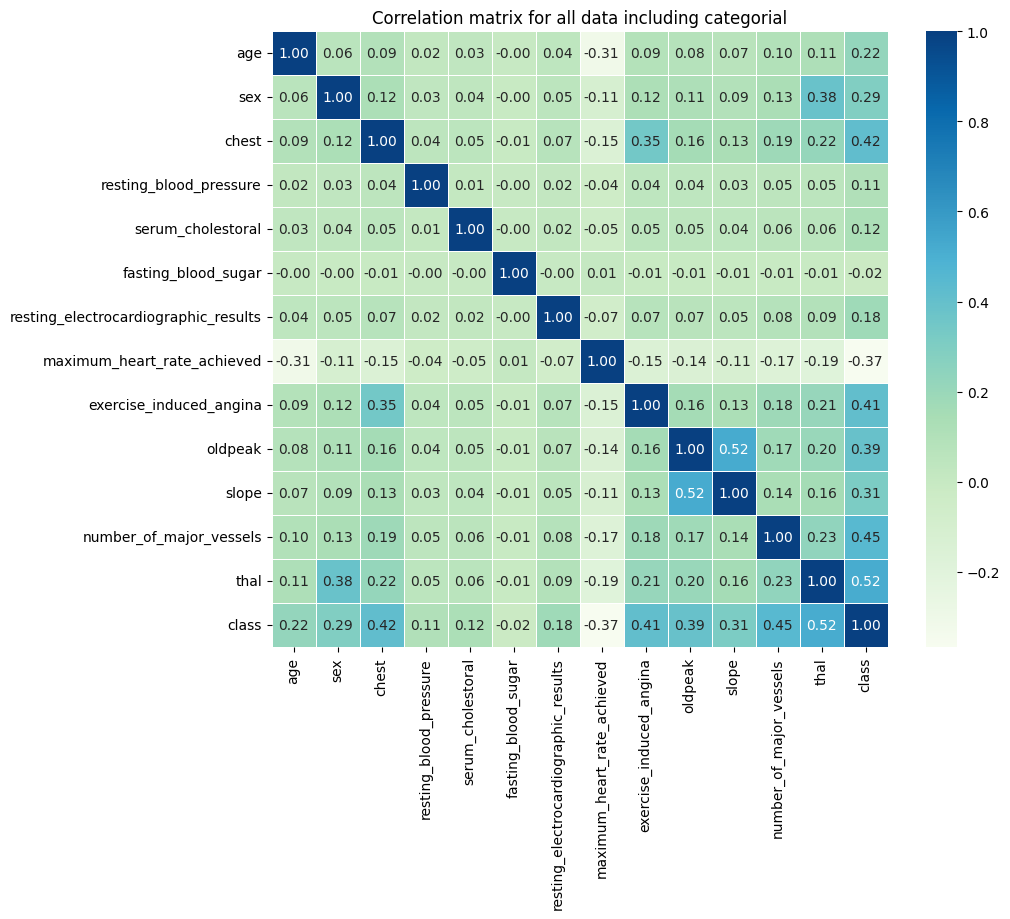

In [16]:
corr_matrix_all = df1.corr()
display(corr_matrix_all)

# Correlation matrix developed for all columns including categorial columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_all, annot=True, cmap='GnBu', square=True, fmt='.2f', linewidths=.5)
plt.title('Correlation matrix for all data including categorial')
plt.show()

In [17]:
# Separating all columns as (X) and target of the model work as (y) - "class" column (binary classification)
X = df1.drop('class', axis=1)
y = df1['class']

In [18]:
# Usage of Princilpal components metod (PCA) to eliminate high-correlated data
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) 
X = pca.fit_transform(X)


# Separating our dataframe for train and test data (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Quantifying amount of data in train and test and balance of classes for discrimination
print(f"Size of train data: {X_train.shape[0]} lines")
print(f"Size of test data: {X_test.shape[0]} lines")
print()
print(f"Balance of classes in train data:\n{y_train.value_counts(normalize=True)}")
print()

Size of train data: 380232 lines
Size of test data: 162957 lines

Balance of classes in train data:
class
0    0.571738
1    0.428262
Name: proportion, dtype: float64



In [19]:
# Calculating amount of features after PCA
print("Amount of features after PCA:", pca.n_components_)

Amount of features after PCA: 3


In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Data standartization
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Data transformation
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Additional library import
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Logistic Regression Model

In [22]:
# Creating class of logistic regression and train our model
log_reg = linear_model.LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [24]:
# Metrics analysis
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# Metrics for train data
print("Metrics for train data:")
print("Accuracy:", accuracy_score(y_train, y_train_predict))
print("Precision:", precision_score(y_train, y_train_predict))
print("Recall:", recall_score(y_train, y_train_predict))
print("F1-score:", f1_score(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


# Metrics for test data
print("Metrics for test data:")
print("Accuracy:", accuracy_score(y_test, y_test_predict))
print("Precision:", precision_score(y_test, y_test_predict))
print("Recall:", recall_score(y_test, y_test_predict))
print("F1-score:", f1_score(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Metrics for train data:
Accuracy: 0.6852369079930148
Precision: 0.669494454394068
Recall: 0.5234126959757798
F1-score: 0.5875090902197851
              precision    recall  f1-score   support

           0       0.69      0.81      0.75    217393
           1       0.67      0.52      0.59    162839

    accuracy                           0.69    380232
   macro avg       0.68      0.66      0.67    380232
weighted avg       0.68      0.69      0.68    380232

Metrics for test data:
Accuracy: 0.6877703934166682
Precision: 0.6734360667767382
Recall: 0.5260073365048432
F1-score: 0.5906611530354471
              precision    recall  f1-score   support

           0       0.69      0.81      0.75     93169
           1       0.67      0.53      0.59     69788

    accuracy                           0.69    162957
   macro avg       0.68      0.67      0.67    162957
weighted avg       0.69      0.69      0.68    162957



In [26]:
# Function for visualization of feature importances
def plot_imp(feature_names, importances):
    indices = np.argsort(importances)[::-1]  
    sorted_names = [feature_names[i] for i in indices]
    sorted_importances = importances[indices]

    
    for name, imp in zip(sorted_names, sorted_importances):
        print(f"{name:40} {imp:.10f}")

    plt.figure(figsize=(10, len(feature_names)//2))
    plt.barh(sorted_names, sorted_importances)
    plt.gca().invert_yaxis()
    plt.xlabel("Importance level")
    plt.title("Diagram of features importance")
    plt.tight_layout()
    plt.show()

sex                                      0.8485688266
age                                      0.3135400945
chest                                    0.1785142908


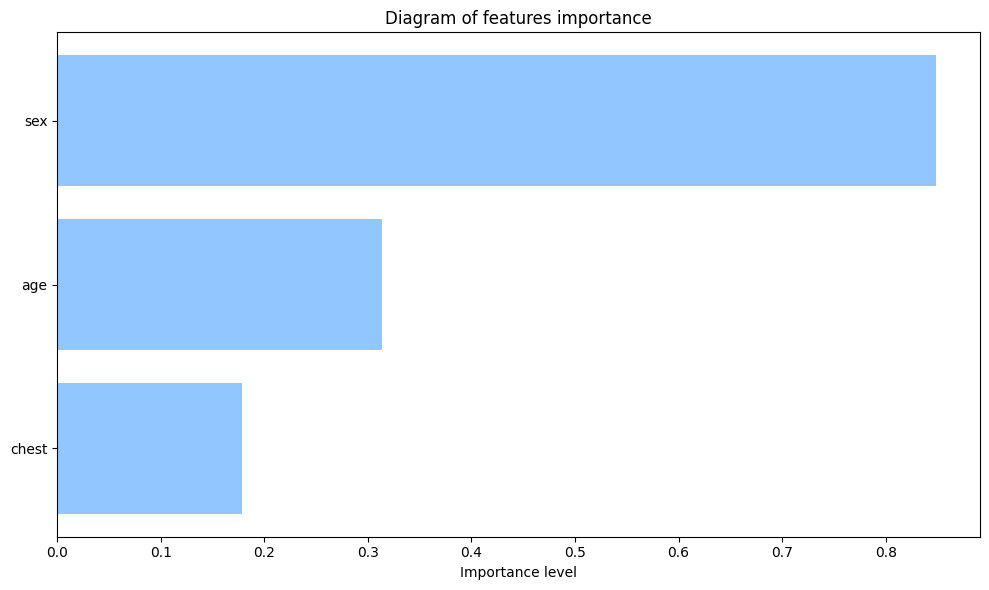

In [27]:
feature_names = df1.drop("class", axis=1).columns.tolist()
plot_imp(feature_names, np.abs(log_reg.coef_[0]))

Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Developing and training of Random Forest Classifier model
r_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
r_forest.fit(X_train, y_train)

# Checking statistics of trained model on train nd test data

y_train_predict = r_forest.predict(X_train)
y_test_predict = r_forest.predict(X_test)
y_pred_proba = r_forest.predict_proba(X_test)[:, 1]

# Train data metrics
print("Metrics for train data:")
print("Accuracy:", accuracy_score(y_train, y_train_predict))
print("Precision:", precision_score(y_train, y_train_predict))
print("Recall:", recall_score(y_train, y_train_predict))
print("F1-score:", f1_score(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


# Metrics for test data
print("Metrics for test data:")
print("Accuracy:", accuracy_score(y_test, y_test_predict))
print("Precision:", precision_score(y_test, y_test_predict))
print("Recall:", recall_score(y_test, y_test_predict))
print("F1-score:", f1_score(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Metrics for train data:
Accuracy: 0.6928007111447748
Precision: 0.6540789138962899
Recall: 0.600009825656016
F1-score: 0.6258787958375105
              precision    recall  f1-score   support

           0       0.72      0.76      0.74    217393
           1       0.65      0.60      0.63    162839

    accuracy                           0.69    380232
   macro avg       0.69      0.68      0.68    380232
weighted avg       0.69      0.69      0.69    380232

Metrics for test data:
Accuracy: 0.6941524451235602
Precision: 0.6561805142338166
Recall: 0.6004613973749069
F1-score: 0.627085671530116
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     93169
           1       0.66      0.60      0.63     69788

    accuracy                           0.69    162957
   macro avg       0.69      0.68      0.68    162957
weighted avg       0.69      0.69      0.69    162957



In [32]:
# Library import for Random Forest optimization
import optuna

In [33]:
# Function for parameters grid for optuna for our RF model
def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators',  50, 500)
  max_depth = trial.suggest_int('max_depth', 3, 20)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)

  
  model = RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  
  model.fit(X_train, y_train)

  
  y_test_pred = model.predict(X_test)

  
  score = recall_score(y_test, y_test_pred)

  return score  

# Create study in maximize direction for recall score
study = optuna.create_study(
    direction='maximize',
    study_name="RandomForestClassifier"
)

# Optimization procedure
study.optimize(optuna_rf, n_trials=5)

[I 2025-07-16 12:35:10,598] A new study created in memory with name: RandomForestClassifier
[I 2025-07-16 12:36:31,050] Trial 0 finished with value: 0.5889694503353012 and parameters: {'n_estimators': 110, 'max_depth': 18, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.5889694503353012.
[I 2025-07-16 12:40:57,891] Trial 1 finished with value: 0.5883676276723792 and parameters: {'n_estimators': 341, 'max_depth': 19, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.5889694503353012.
[I 2025-07-16 12:41:38,574] Trial 2 finished with value: 0.5777640855161346 and parameters: {'n_estimators': 211, 'max_depth': 3, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.5889694503353012.
[I 2025-07-16 12:43:31,657] Trial 3 finished with value: 0.5876655012323035 and parameters: {'n_estimators': 170, 'max_depth': 14, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.5889694503353012.
[I 2025-07-16 12:47:01,108] Trial 4 finished with value: 0.5879377543417207 and parameters: {

In [34]:
# Results for train data
print("Best hyperparameters {}".format(study.best_params))
print("Best recall score: {:.2f}".format(study.best_value))

Best hyperparameters {'n_estimators': 110, 'max_depth': 18, 'min_samples_leaf': 18}
Best recall score: 0.59


In [35]:
# Using our best hyperparameters found in RF model
r_forest = RandomForestClassifier(**study.best_params, random_state=42)
r_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=18, n_estimators=110,
                       random_state=42)

In [36]:
# Metrics analysis

y_train_predict = r_forest.predict(X_train)
y_test_predict = r_forest.predict(X_test)
y_pred_proba = r_forest.predict_proba(X_test)[:, 1]

# Train data metrics
print("Metrics for train data:")
print("Accuracy:", accuracy_score(y_train, y_train_predict))
print("Precision:", precision_score(y_train, y_train_predict))
print("Recall:", recall_score(y_train, y_train_predict))
print("F1-score:", f1_score(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


# Test data metrics
print("Metrics for test data:")
print("Accuracy:", accuracy_score(y_test, y_test_predict))
print("Precision:", precision_score(y_test, y_test_predict))
print("Recall:", recall_score(y_test, y_test_predict))
print("F1-score:", f1_score(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Metrics for train data:
Accuracy: 0.7189452755160007
Precision: 0.6918447227534772
Recall: 0.6197962404583669
F1-score: 0.6538416688261207
              precision    recall  f1-score   support

           0       0.74      0.79      0.76    217393
           1       0.69      0.62      0.65    162839

    accuracy                           0.72    380232
   macro avg       0.71      0.71      0.71    380232
weighted avg       0.72      0.72      0.72    380232

Metrics for test data:
Accuracy: 0.6936983375982622
Precision: 0.6594205223641147
Recall: 0.5889694503353012
F1-score: 0.6222070844686648
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     93169
           1       0.66      0.59      0.62     69788

    accuracy                           0.69    162957
   macro avg       0.69      0.68      0.68    162957
weighted avg       0.69      0.69      0.69    162957



sex                                      0.6778864699
age                                      0.1804058974
chest                                    0.1417076326


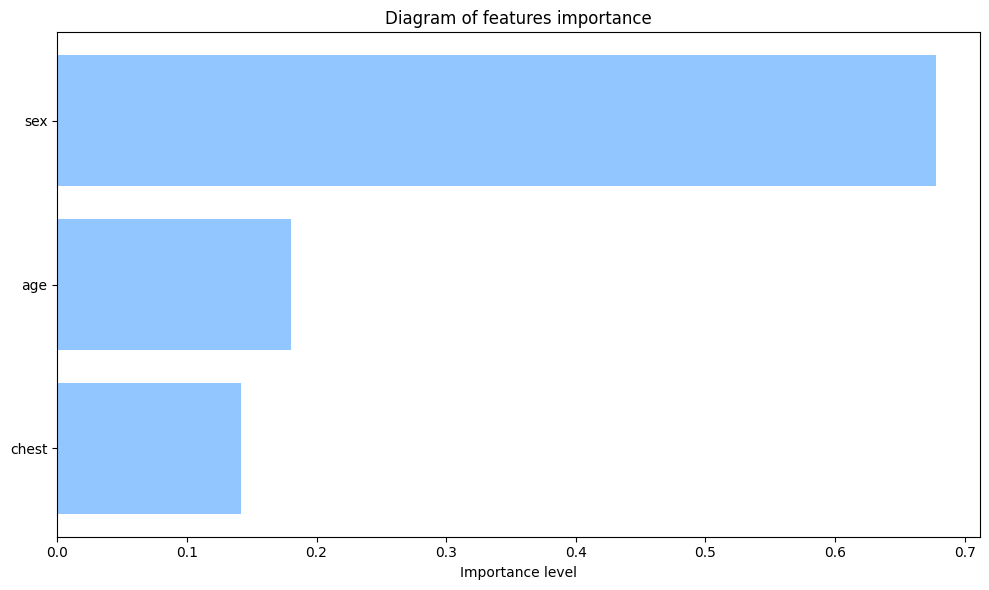

In [37]:
# Features importance graph
plot_imp(feature_names, r_forest.feature_importances_)

CatBoost

In [66]:
# Separating all columns as (X) and target of the model work as (y) - "class" column (binary classification)
X_new = df1.drop('class', axis=1)
y_new = df1['class']
display(X_new)
display(y_new)

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599994,63.929009,0,3.000000,110.559169,256.646293,1,2,150.120707,0,1.734994,1,0,3
599995,47.832254,1,4.000000,118.418763,300.876566,0,2,161.831133,1,3.151432,2,2,7
599996,42.106575,1,3.000000,106.110468,271.719955,0,2,178.749408,1,1.925267,2,0,7
599997,41.579352,1,1.295676,128.896878,279.301722,0,0,175.869174,1,0.000000,1,0,7


0         1
1         0
2         1
3         1
4         0
         ..
599994    0
599995    1
599996    1
599997    0
599998    1
Name: class, Length: 543189, dtype: int64

In [67]:
# Separating our dataframe for train and test data (70% / 30%)
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
    X_new, y_new, test_size=0.3, random_state=42, stratify=y
)


In [68]:
# Data standartization
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_cb)

# Data transformation
X_train_cb = scaler.transform(X_train_cb)
X_test_cb = scaler.transform(X_test_cb)

In [43]:
# Library import
from catboost import (
    CatBoostClassifier,
    CatBoostRegressor,
)

In [69]:
# Training Catboost model on our data
cat = CatBoostClassifier(verbose=0,random_state=42)
cat.fit(X_train_cb, y_train_cb)



y_train_predict = cat.predict(X_train_cb)
y_test_predict = cat.predict(X_test_cb)
y_pred_proba = cat.predict_proba(X_test_cb)[:, 1]

# Train data mertics
print("Metrics for train data:")
print("Accuracy:", accuracy_score(y_train_cb, y_train_predict))
print("Precision:", precision_score(y_train_cb, y_train_predict))
print("Recall:", recall_score(y_train_cb, y_train_predict))
print("F1-score:", f1_score(y_train_cb, y_train_predict))
print(metrics.classification_report(y_train_cb, y_train_predict))


# Test data metrics
print("Metrics for test data:")
print("Accuracy:", accuracy_score(y_test_cb, y_test_predict))
print("Precision:", precision_score(y_test_cb, y_test_predict))
print("Recall:", recall_score(y_test_cb, y_test_predict))
print("F1-score:", f1_score(y_test_cb, y_test_predict))
print(metrics.classification_report(y_test_cb, y_test_predict))

Metrics for train data:
Accuracy: 0.9111253129668203
Precision: 0.9035966722962407
Recall: 0.8871216354804439
F1-score: 0.8952833667483708
              precision    recall  f1-score   support

           0       0.92      0.93      0.92    217393
           1       0.90      0.89      0.90    162839

    accuracy                           0.91    380232
   macro avg       0.91      0.91      0.91    380232
weighted avg       0.91      0.91      0.91    380232

Metrics for test data:
Accuracy: 0.903502150874157
Precision: 0.8931911736897992
Recall: 0.8798933914139967
F1-score: 0.8864924171881879
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     93169
           1       0.89      0.88      0.89     69788

    accuracy                           0.90    162957
   macro avg       0.90      0.90      0.90    162957
weighted avg       0.90      0.90      0.90    162957



maximum_heart_rate_achieved              15.1913563270
thal                                     14.6456470065
number_of_major_vessels                  12.8264983834
chest                                    11.5812934941
age                                      11.5323080369
oldpeak                                  10.4353274942
slope                                    6.6127071765
exercise_induced_angina                  5.2129290751
serum_cholestoral                        3.7566907282
resting_blood_pressure                   3.3364277918
sex                                      2.7108465288
resting_electrocardiographic_results     1.8949953802
fasting_blood_sugar                      0.2629725772


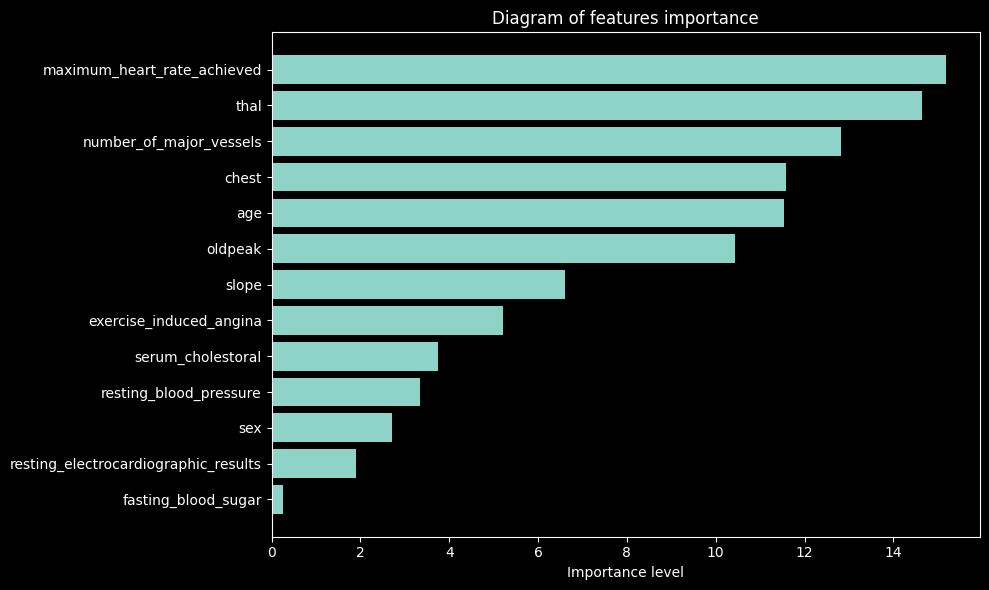

In [70]:
# Features importance graph
plot_imp(feature_names, cat.feature_importances_)

Neural Network based on TensorFlow library

In [49]:
tf.__version__

'2.20.0-dev20250711'

In [50]:
# Library import
from tensorflow.keras.optimizers import Adam

In [71]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_cb.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\79296\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.002),
    metrics=[tf.keras.metrics.Recall(name='recall')]
)

In [79]:
history = model.fit(
    X_train_cb, 
    y_train_cb, 
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
9506/9506 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.2423 - recall: 0.8736 - val_loss: 0.2500 - val_recall: 0.8718
Epoch 2/10
9506/9506 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.2418 - recall: 0.8731 - val_loss: 0.2482 - val_recall: 0.8636
Epoch 3/10
9506/9506 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.2414 - recall: 0.8739 - val_loss: 0.2473 - val_recall: 0.8700
Epoch 4/10
9506/9506 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.2413 - recall: 0.8744 - val_loss: 0.2478 - val_recall: 0.8597
Epoch 5/10
9506/9506 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.2409 - recall: 0.8737 - val_loss: 0.2475 - val_recall: 0.8644
Epoch 6/10
9506/9506 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.2408 - recall: 0.8743 - val_loss: 0.2477 - val_recall: 0.8761
Epoch 7/10
9506/9506 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.2407 - recall: 0.8747 - val_loss: 0.2492 - val_recall: 0.8698
Epoch 8/10
9506/9506 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.2404 - recall: 0.8743 - val_loss: 0.2480 - val

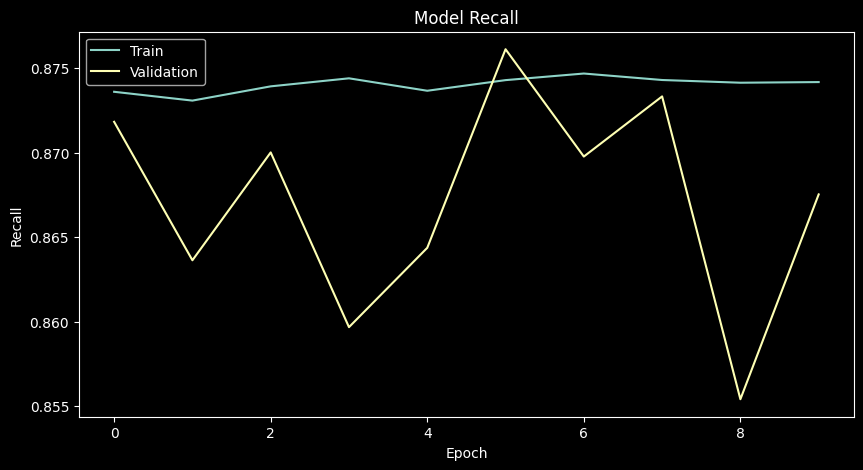

In [80]:
# Visualization of recall optimization
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall']) 
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

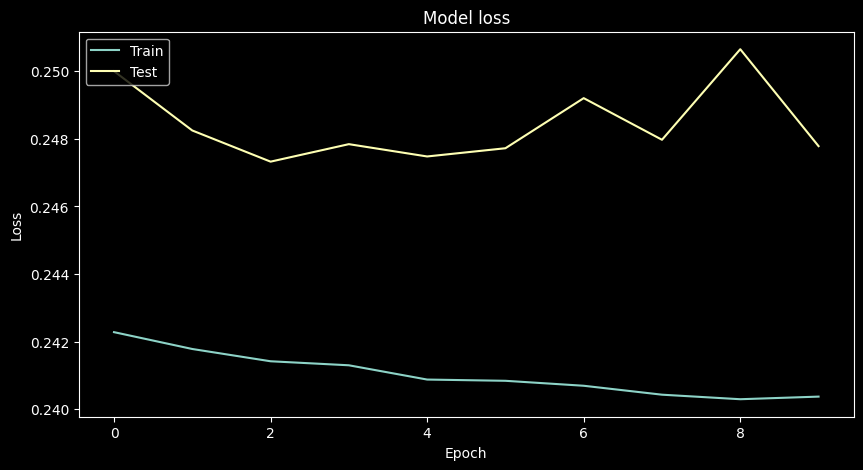

In [81]:
# Visualization of loss values optimization during learning
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [82]:
# Proceeding with model prediction
y_train_probs = model.predict(X_train_cb)
y_test_probs = model.predict(X_test_cb)

# Classes determination in classification (0 или 1) with 0.5 treshold for possibilities
y_train_pred = (y_train_probs > 0.5).astype(np.int32)
y_test_pred = (y_test_probs > 0.5).astype(np.int32)

# Train data metrics
print("Metrics for train data:")
print(f"Accuracy:  {accuracy_score(y_train_cb, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train_cb, y_train_pred):.4f}")
print(f"Recall:    {recall_score(y_train_cb, y_train_pred):.4f}")
print(f"F1-score:  {f1_score(y_train_cb, y_train_pred):.4f}")
print(classification_report(y_train_cb, y_train_pred))

# Test data metrics
print("Metrics for test data:")
print(f"Accuracy:  {accuracy_score(y_test_cb, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test_cb, y_test_pred):.4f}")
print(f"Recall:    {recall_score(y_test_cb, y_test_pred):.4f}")
print(f"F1-score:  {f1_score(y_test_cb, y_test_pred):.4f}")
print(classification_report(y_test_cb, y_test_pred))



11883/11883 ━━━━━━━━━━━━━━━━━━━━ 7s 598us/step
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 3s 589us/step
Metrics for train data:
Accuracy:  0.9010
Precision: 0.8933
Recall:    0.8733
F1-score:  0.8831
              precision    recall  f1-score   support

           0       0.91      0.92      0.91    217393
           1       0.89      0.87      0.88    162839

    accuracy                           0.90    380232
   macro avg       0.90      0.90      0.90    380232
weighted avg       0.90      0.90      0.90    380232

Metrics for test data:
Accuracy:  0.9005
Precision: 0.8919
Recall:    0.8735
F1-score:  0.8826
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     93169
           1       0.89      0.87      0.88     69788

    accuracy                           0.90    162957
   macro avg       0.90      0.90      0.90    162957
weighted avg       0.90      0.90      0.90    162957



In [83]:
# Let's predict classes of 2nd dataset with our neural network
pred.drop(['ID'], axis=1, inplace=True)
display(pred)

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,55.375600,0,3.000000,111.629089,272.110688,0,0,154.583762,0,0.000000,1,0,3
399996,53.782685,1,4.000000,102.819138,285.219928,0,2,153.252226,1,0.000000,1,3,7
399997,55.530874,0,2.053896,106.656515,210.870682,0,2,152.268989,1,1.719441,2,0,3
399998,55.442225,1,4.000000,118.354111,280.867061,0,2,159.820939,0,0.000000,1,0,3


In [84]:
scaler = preprocessing.StandardScaler()
scaler.fit(pred)

StandardScaler()

In [85]:
model.predict(pred)

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8s 625us/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# Array with predicted classes for 2nd dataframe
np.argmax(model.predict(pred), axis = 1)

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8s 621us/step


array([0, 0, 0, ..., 0, 0, 0])

In [87]:
# Saving of final neural network model
model.save('heart_desease_classifier.keras')